# Prostate Cancer Recurrence Analysis
In this notebook, I explore and analyze the dataset "Blood Storage" from Cleveland Clinic Lerner Research Institute (http://www.lerner.ccf.org/qhs/datasets/).

**Let's play.**


### Dataset Description
categorical data: RBC Age Group, AA, FamHx, TVol, T Stage, bGS, BN+, OrganConfined,PreopTherapy,sGS, AnyAdjTherapy,	AdjRadTherapy,	Recurrence,	Censor.

...
coming soon

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set pastel color for plots
sns.set(style="ticks", palette="pastel")

In [23]:
# import dataset
df = pd.read_csv("https://raw.githubusercontent.com/elayni/prostate-cancer-recurrence-analysis/main/Dataset/BloodStorage.csv", error_bad_lines=False)

df.head()

,RBC Age Group,Median RBC Age,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,3,25,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,3,25,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,3,25,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10
3,2,15,65.8,0,0,46.0,1.0,1.0,1.0,0,1,4.40,0,2,3,0,0,0,1,59.47
4,2,15,63.2,0,0,60.0,2.0,1.0,2.0,0,1,21.40,0,3,3,0,0,0,1,1.23


In [32]:
# missing data?
df.isna().any()

RBC Age Group       False
Median RBC Age      False
Age                 False
AA                  False
FamHx               False
PVol                 True
TVol                 True
T Stage              True
bGS                  True
BN+                 False
OrganConfined       False
PreopPSA             True
PreopTherapy        False
Units               False
sGS                 False
AnyAdjTherapy       False
AdjRadTherapy       False
Recurrence          False
Censor              False
TimeToRecurrence     True
dtype: bool

In [33]:
# count missing data
df.isna().sum()

RBC Age Group        0
Median RBC Age       0
Age                  0
AA                   0
FamHx                0
PVol                 9
TVol                 6
T Stage             13
bGS                  2
BN+                  0
OrganConfined        0
PreopPSA             3
PreopTherapy         0
Units                0
sGS                  0
AnyAdjTherapy        0
AdjRadTherapy        0
Recurrence           0
Censor               0
TimeToRecurrence     1
dtype: int64

In [34]:
# replacing missing data to column median
df['PVol'].fillna(df['PVol'].median(), inplace=True)
df['PreopPSA'].fillna(df['PreopPSA'].median(), inplace=True)
df['TimeToRecurrence'].fillna(df['TimeToRecurrence'].median(), inplace=True)
# only categorical missing data 
df.isna().any()

RBC Age Group       False
Median RBC Age      False
Age                 False
AA                  False
FamHx               False
PVol                False
TVol                 True
T Stage              True
bGS                  True
BN+                 False
OrganConfined       False
PreopPSA            False
PreopTherapy        False
Units               False
sGS                 False
AnyAdjTherapy       False
AdjRadTherapy       False
Recurrence          False
Censor              False
TimeToRecurrence    False
dtype: bool

In [80]:
# drop categorical data
df_nocatg = df.drop(["RBC Age Group", "AA", "FamHx", "TVol", "T Stage",
                    "bGS", "BN+"], axis = 1)
df_nocatg = df_nocatg.drop(["PreopTherapy", "sGS", "AnyAdjTherapy", "OrganConfined", 
                           "AdjRadTherapy", "Recurrence", "Censor"], axis = 1)

# second part
# centrality and dispersion measures (média, mediana, moda, variância, desvio padrão)
df_means = np.array(np.mean(df_nocatg))
df_medians = np.median(df_nocatg, axis = 0)

In [81]:
print(df_means)
print(df_medians)

[16.70886076 61.15727848 56.23607595  8.16629747  2.4556962  32.89376582]
[15.   61.85 49.    6.2   2.   25.3 ]


In [82]:
# arrendondar

In [83]:
print(df_means)
print(df_medians)

[16.70886076 61.15727848 56.23607595  8.16629747  2.4556962  32.89376582]
[15.   61.85 49.    6.2   2.   25.3 ]


<Figure size 432x288 with 0 Axes>

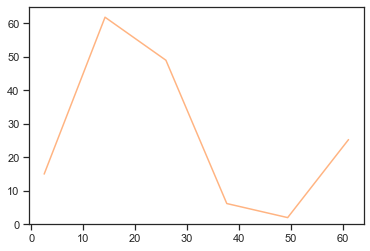

In [70]:
plt.figure()

fig, ax = plt.subplots()
n, bins, patches = ax.hist(df_means, 5, density=True)
ax.plot(bins, df_medians, '-')

plt.show()

In [8]:
np.var(df)

RBC Age Group         0.674041
Median RBC Age       39.326630
Age                  52.255612
AA                    0.143757
FamHx                 0.168883
PVol                908.976112
TVol                  0.497700
T Stage               0.099620
bGS                   0.453822
BN+                   0.053717
OrganConfined         0.225955
PreopPSA             35.949976
PreopTherapy          0.105792
Units                 3.596138
sGS                   0.620173
AnyAdjTherapy         0.021661
AdjRadTherapy         0.003155
Recurrence            0.141684
Censor                0.141684
TimeToRecurrence    813.015299
dtype: float64